In [1]:
# Import necessary libraries

# Data manipulation
import pandas as pd

# Machine learning
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Handle imbalanced datasets
from imblearn.over_sampling import SMOTE

# Save and load models
from joblib import dump, load

# System operations
import sys

# Add paths to system path for custom module imports
sys.path.append('../src/data')
sys.path.append('../src/features')
sys.path.append('../src/models')
sys.path.append('../src/visualization')

# Import custom functions from 'make_dataset' module
from make_dataset import load_data, display_head, missing_values_analysis, target_distribution

# Load data
train_data, test_data, sample_submission, metadata = load_data()

# Display dataset heads
train_head, test_head, sample_submission_head, metadata_head = display_head(train_data, test_data, sample_submission, metadata)

# Show head of training data
train_head

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [2]:
# Show head of test data
test_head

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,...,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,cf302b4d-84f7-4124-a25d-a75eed31978b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,...,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,f91837cd-4f49-4b70-963d-aeb82c6ce3da
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,...,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,53ec2a29-1e7d-4c6d-86d7-d60d02af8916
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,...,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,32402798-471c-4a54-8cb4-29cd95199014
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,...,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,73b960f9-27b8-4431-9d23-a760e9bbc360


In [3]:
# Show head of sample submission data
sample_submission_head

,player_id,drafted
0,cf302b4d-84f7-4124-a25d-a75eed31978b,0.51
1,f91837cd-4f49-4b70-963d-aeb82c6ce3da,0.92
2,53ec2a29-1e7d-4c6d-86d7-d60d02af8916,0.14
3,32402798-471c-4a54-8cb4-29cd95199014,0.71
4,73b960f9-27b8-4431-9d23-a760e9bbc360,0.60


In [4]:
# Show head of metadata
metadata_head

,feature,name,description
0,1,team,Name of team
1,2,conf,Name of conference
2,3,GP,Games played
3,4,Min_per,Player's percentage of available team minutes ...
4,5,ORtg,ORtg - Offensive Rating (available since the 1...


In [5]:
# Analyze missing values in training data
missing_vals, missing_vals_percentage = missing_values_analysis(train_data)

# Create a DataFrame to display columns with missing values and their percentages
missing_data_df = pd.DataFrame({
    'Missing Values': missing_vals,
    'Percentage (%)': missing_vals_percentage
})

# Show the DataFrame
missing_data_df

,Missing Values,Percentage (%)
yr,292,0.520583
ht,98,0.174716
num,4690,8.361413
Rec_Rank,39055,69.627926
ast_tov,4190,7.470004
rimmade,6081,10.841311
rimmade_rimmiss,6081,10.841311
midmade,6081,10.841311
midmade_midmiss,6081,10.841311
rim_ratio,9464,16.872582


In [6]:
# Current draft distribution
draft_distribution = target_distribution(train_data)
draft_distribution

drafted
0.0    0.990444
1.0    0.009556
Name: proportion, dtype: float64

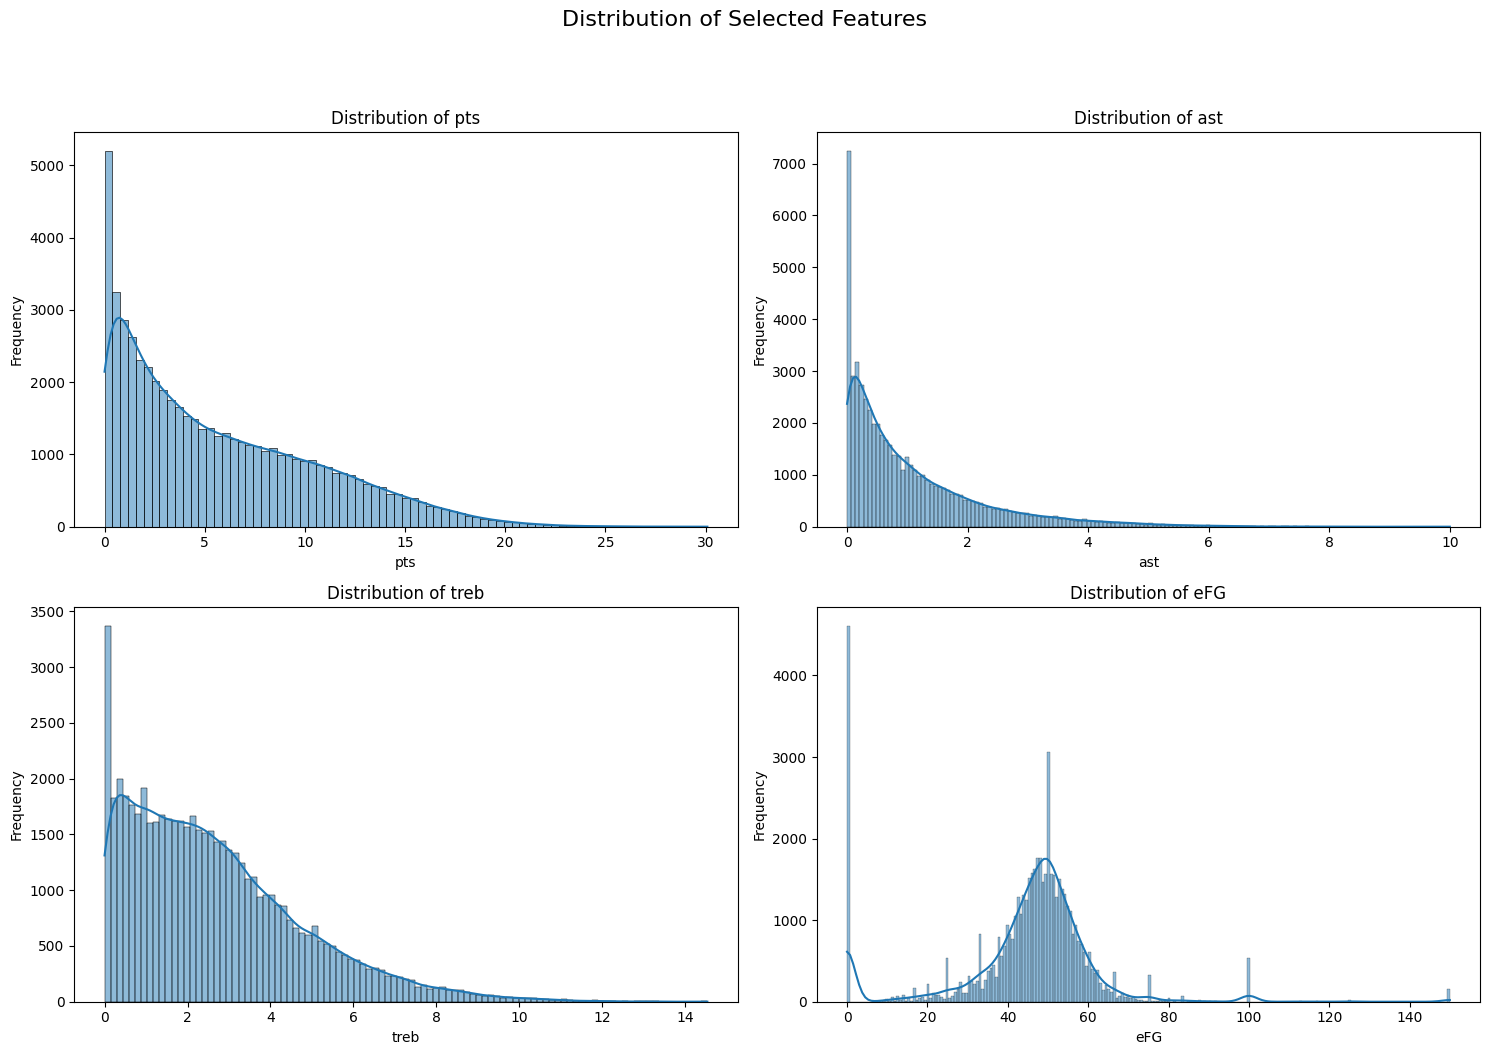

In [7]:
# Plot four selected features
from visualize import plot_feature_distributions
plot_feature_distributions(train_data)

In [2]:
# Import DataPreprocessor class
from data_preprocessor import DataPreprocessor

# Initialize DataPreprocessor
preprocessor = DataPreprocessor()

# Preprocess training and test data
processed_train_data = preprocessor.preprocess_train(train_data)
processed_test_data = preprocessor.preprocess_test(test_data)

# Save the processed data to CSV files
processed_train_data.to_csv('../data/processed/processed_train_data.csv', index=False)
processed_test_data.to_csv('../data/processed/processed_test_data.csv', index=False)

# Separate features and target variable
X = processed_train_data.drop(columns=['drafted'])
y = processed_train_data['drafted']

# Identify categorical columns and encode & scale the data
categorical_cols = X.select_dtypes(include=['object']).columns.drop('player_id')
X_encoded, X_encoded_scaled = preprocessor.encode_and_scale(X, categorical_cols)

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_resampled_array, y_resampled = smote.fit_resample(X_encoded_scaled, y)

# Convert resampled data back to DataFrame
X_resampled_df = pd.DataFrame(X_resampled_array, columns=X_encoded.columns.drop('player_id', errors='ignore'))

# Assign 'player_id' to resampled data based on closest original data points
closest_indices = pairwise_distances_argmin_min(X_resampled_array, X_encoded_scaled)[0]
X_resampled_df['player_id'] = X_encoded['player_id'].iloc[closest_indices].values

X_resampled = X_resampled_df

# Split the resampled data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Encode and scale the test data
test_encoded, test_encoded_scaled = preprocessor.encode_and_scale_test(
    processed_test_data, 
    categorical_cols, 
    X_encoded.columns
)

In [9]:
# Import Model class
from train_model import Model
# Initialize Model
model1 = Model()

# Ensure 'player_id' is not in the training data
X_train_numeric = X_train.drop(columns=['player_id'], errors='ignore')

# Train a basic Random Forest Classifier model for plotting feature importance
model1.train(X_train_numeric, y_train)

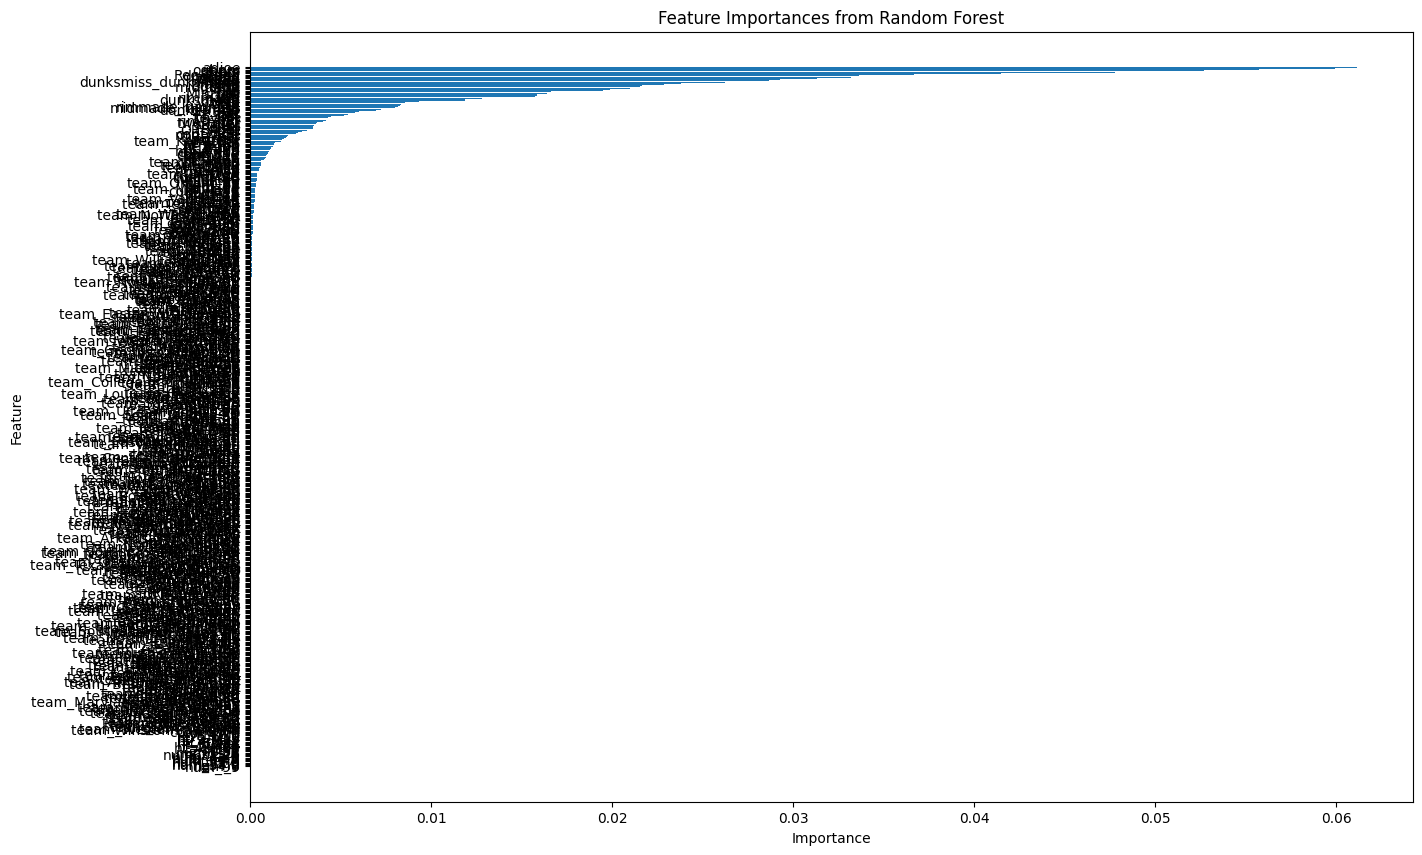

In [10]:
# Plot to take a hint of what threshold should be set
from visualize import plot_feature_importances
plot_feature_importances(model1, X_encoded)

In [31]:
# Import Feature class
from build_features import Feature
# Initialize Feature
features = Feature()

# Feature selection (excluding 'player_id')
selected_features = features.feature_selection(X_train.drop(columns=['player_id']), y_train)

# Find out the number of selected features
num_selected_features = len(selected_features)
print(f"Number of selected features: {num_selected_features}")

# Select the relevant features from training and validation datasets
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

Number of selected features: 28


In [26]:
# Import Model class
from train_model import Model

# Ensure 'player_id' is not in the training data
X_train1 = X_train.drop(columns=['player_id'], errors='ignore')

model = Model()
model.train(X_train1, y_train)

# Define a parameter grid for hyperparameter tuning via grid search
param_grid = {
    'n_estimators': [50, 100, 200],             # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                  # Method for sampling data points (with or without replacement)
}
# Use grid search to find the best hyperparameters for the model
model.grid_search(X_train1, y_train, param_grid)

# After performing grid search dumping best the model
dump(model.best_model, '../models/best_rf_model.pkl')

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  16.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  16.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  17.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  17.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  17.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  17.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  32.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time

/Users/vishalraj/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  16.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  15.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  15.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  15.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  31.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  30.5s
[CV] END bootstrap=True, max_depth=None, min_samples

['../models/best_rf_model.pkl']

In [13]:
# Import Model class
from train_model import Model
# Initialize Model
model = Model()

# Train the model using the selected features of the training dataset
model.train(X_train_selected, y_train)

# Define a parameter grid for hyperparameter tuning via grid search
param_grid = {
    'n_estimators': [50, 100, 200],             # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                  # Method for sampling data points (with or without replacement)
}
# Use grid search to find the best hyperparameters for the model
model.grid_search(X_train_selected, y_train, param_grid)

# After performing grid search dumping best the model
dump(model.best_model, '../models/best_rf_model_feature_sel.pkl')

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  12.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  15.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  15.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  15.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  16.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  16.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  31.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time

['../models/best_rf_model.pkl']

In [27]:
# Load the model from the file
loaded_model = load('../models/best_rf_model.pkl')

# Ensure 'player_id' is not in the validation data
X_val1 = X_val.drop(columns=['player_id'], errors='ignore')

# Predict the probabilities for the positive class on validation data
y_pred_proba = loaded_model.predict_proba(X_val1)[:, 1]

# Calculate the ROC-AUC score for the predictions
roc_auc = roc_auc_score(y_val, y_pred_proba)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.999986132207113


In [33]:
# Load the model from the file
loaded_model1 = load('../models/best_rf_model_feature_sel.pkl')

# Predict the probabilities for the positive class on validation data
y_pred_proba1 = loaded_model1.predict_proba(X_val_selected)[:, 1]

# Calculate the ROC-AUC score for the predictions
roc_auc1 = roc_auc_score(y_val, y_pred_proba1)
print("ROC-AUC:", roc_auc1)

ROC-AUC: 0.9998198685488762


In [37]:
# Import Predict functions
from predict_model import predict_without_features

# Now, use the predict function
submission_without_features = predict_without_features(test_encoded, loaded_model)

# Save the submission dataframe to a CSV file
submission_without_features.to_csv('../submissions/submission_best.csv', index=False)

In [38]:
# Import Predict functions
from predict_model import predict_with_features

# Now, use the predict function
submission_with_features = predict_with_features(test_encoded, loaded_model1, selected_features)
# Save the submission dataframe to a CSV file
submission_with_features.to_csv('../submissions/submission_best_new.csv', index=False)